# 疫学的因果関係
統計学が物的証拠として使われる代表例としては法律の決定や他何らかのトラブルに対する因果関係を証明するために疫学的因果関係を推定する。ここで、疫学的因果関係は7つの構成要素があるが、一般的には疫学四原則の「時間的関連性」「量的相関性」「質的相関性」「原因と結果の関連性」になる。本項では疫学四原則の文面をそのままプログラムとして実装するため「原因と結果の関連性」以外を実装する。

また、疫学における因果関係はその専門分野の知識を多く持っていなくても使用できるメリットがあるため、研究活動において最初の頃には役に立ちやすい。

参考1：https://www.youtube.com/watch?v=lHnblpw4YFU

参考2：https://chuo-kentetsu.co.jp/cgk/topix/tecrep30.pdf


# ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 時間的関連性
原因と結果についての順序関係を正しく把握する。例えばX→Yが正しいのかY→Xが正しいかなど、ある事象に対する因果関係における順序について考察する。

ここでは一例としてゴルフの来場について、天気が原因でゴルフを結果として考えてどの天気の時にゴルフをするか、また結果と原因の順序が変わることで数値の変動を確認する。

### データの確認

In [2]:
df = pd.read_csv("golf.csv", encoding="shift-jis")
df.head()

,天気,気温,湿度,風,ゴルフ
0,晴,29,85,弱,しない
1,晴,27,90,強,しない
2,曇,28,78,弱,する
3,雨,21,96,弱,する
4,雨,20,80,弱,する


### ベイズの定理で原因と結果の確率を計算する

In [3]:
x_name = "天気"
y_name = "ゴルフ"

In [4]:
x_val = list(set(df[x_name].values.tolist()))
for x in x_val:
    dfx = df.query("%s=='%s'"%(x_name, x))
    y_val = list(set(dfx[y_name].values.tolist()))
    for y in y_val:
        dfxy = dfx.query("%s=='%s'"%(y_name, y))
        print("p(%s=%s | %s=%s) = %.2f"%(y_name, y, x_name, x, len(dfxy)/len(dfx)))

p(ゴルフ=する | 天気=雨) = 0.60
p(ゴルフ=しない | 天気=雨) = 0.40
p(ゴルフ=する | 天気=曇) = 1.00
p(ゴルフ=する | 天気=晴) = 0.40
p(ゴルフ=しない | 天気=晴) = 0.60


In [5]:
y_val = list(set(df[y_name].values.tolist()))
for y in y_val:
    dfy = df.query("%s=='%s'"%(y_name, y))
    x_val = list(set(dfy[x_name].values.tolist()))
    for x in x_val:
        dfyx = dfy.query("%s=='%s'"%(x_name, x))
        print("p(%s=%s | %s=%s) = %.2f"%(x_name, x, y_name, y, len(dfyx)/len(dfy)))

p(天気=雨 | ゴルフ=する) = 0.33
p(天気=曇 | ゴルフ=する) = 0.44
p(天気=晴 | ゴルフ=する) = 0.22
p(天気=雨 | ゴルフ=しない) = 0.40
p(天気=晴 | ゴルフ=しない) = 0.60


### 結果の解釈
この結果から曇が原因でゴルフを行う事が結果になることが分かる。元々100%だった「曇→ゴルフ」が「ゴルフ→曇」にした場合は44%に変動し、曇が順序として原因と分かる。

## 量的相関性
調べたい量的変数を選び相関係数を求める。ただし、条件によって変わる可能性を考慮して質的変数で条件を絞り、それによって相関に違いが現れるかを確認する。

ここでは人口一人当たりの事件発生率と低賃金労働の従事に相関があるかを考える。条件の変更はチャールズ川の周辺かどうか。

In [6]:
df = pd.read_csv("boston.csv")
df.head()

,PRICE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


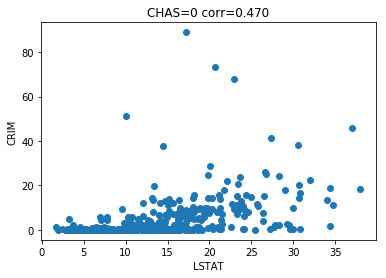

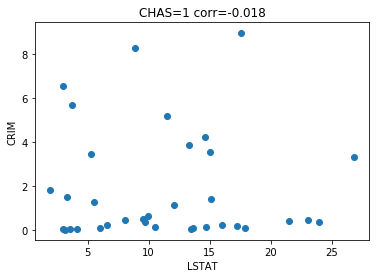

In [7]:
val = list(set(df["CHAS"].values.tolist()))
corrarray = []
for v in val:
    dfv = df.query("CHAS==%d"%(v))
    x1 = dfv["LSTAT"].values
    x2 = dfv["CRIM"].values
    corr = np.corrcoef(x1, x2)[0][1]
    plt.scatter(x1, x2)
    plt.xlabel("LSTAT")
    plt.ylabel("CRIM")
    plt.title("CHAS=%d corr=%.3f"%(v, corr))
    plt.show()
    corrarray.append(["CHAS", v, corr])

In [8]:
dfc = pd.DataFrame(corrarray)
dfc.columns = ["項目", "質的数値", "相関係数"]
dfc

,項目,質的数値,相関係数
0,CHAS,0,0.469725
1,CHAS,1,-0.018366


### 相対危険度(相対リスク)
チャールズ川周辺に住んでいる人を分母にし、チャールズ川以外に住む場合の相対危険度を算出

In [9]:
crime0 = df.query("CHAS==0")["CRIM"].values
crime1 = df.query("CHAS==1")["CRIM"].values
print("相対危険度: %.2f"%((sum(crime0)/len(crime0))/(sum(crime1)/len(crime1))))

相対危険度: 2.02


### 結果の解釈
チャールズ川周辺ではない場合は低賃金と犯罪率の相関がやや弱いが確認できるが、チャールズ川周辺の場合低賃金と犯罪率の相関が確認できないため、チャールズ川周辺で低賃金と犯罪が結びつかない何らかの要因が考えられる。

また、相対危険度からチャールズ川周辺に住まない場合、チャールズ川周辺に住んでいる場合と比べて約2倍の犯罪率となる。

## 質的相関性(要修正)
過去の類似事例や研究結果などから性質的に一致している事を確認する。ここでは質的変数について、そこから肯定的な結果を含めて相関があるかを算出する。

ここでは質的変数と逮捕について相関係数を算出し、最も相関がある項目を探す。

In [10]:
df = pd.read_csv("rossi.csv")
df.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [11]:
dfq = df.drop(["age", "week", "prio"], axis=1)
dfq_corr = dfq.corr()
dfq_corr

,arrest,fin,race,wexp,mar,paro
arrest,1.000000,-0.094538,0.031795,-0.139900,-0.095831,-0.026574
fin,-0.094538,1.000000,0.063502,0.004678,-0.035279,-0.014293
race,0.031795,0.063502,1.000000,-0.038453,-0.053716,0.040037
wexp,-0.139900,0.004678,-0.038453,1.000000,0.252340,0.051418
mar,-0.095831,-0.035279,-0.053716,0.252340,1.000000,0.090662
paro,-0.026574,-0.014293,0.040037,0.051418,0.090662,1.000000


### 結果の解釈
逮捕の有無と相関が最も強い項目は労働経験の有無ではあるが、相関係数の絶対値が0.8を超えないため強い相関があるとは言えない。